<a href="https://colab.research.google.com/github/charookc5/AIML_internship/blob/main/AIML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries Needed

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Optional, for interactivity

sns.set(style='whitegrid')
%matplotlib inline


Load and Understand the Dataset

In [24]:
df = pd.read_csv('/content/Titanic-Dataset.csv')


In [25]:
df.head()
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 Missing Values

In [26]:
df.isnull().sum().sort_values(ascending=False)


,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


 Descriptive Statistics

In [27]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Univariate Analysis

Text(0.5, 1.0, 'Age Distribution')

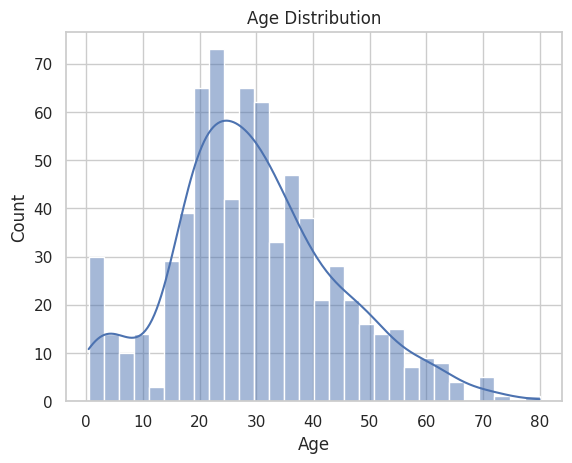

In [28]:
#age distribution
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')


Text(0.5, 1.0, 'Fare Distribution')

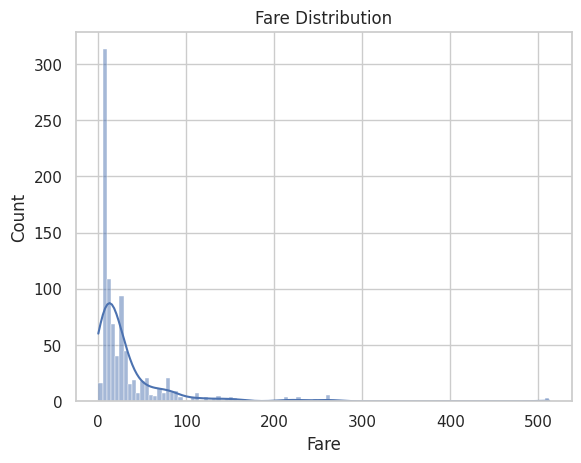

In [29]:
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')


Boxplots

Text(0.5, 1.0, 'Age vs Pclass')

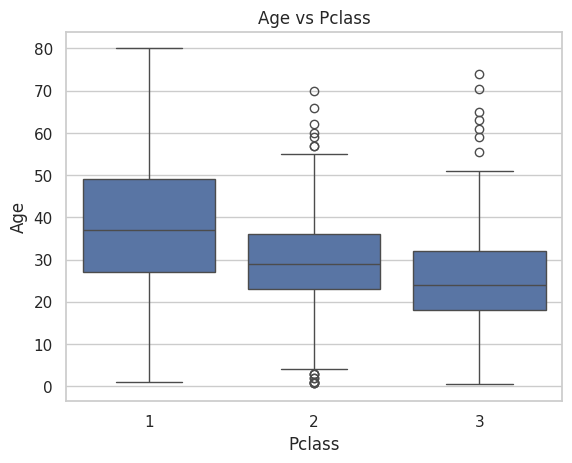

In [30]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age vs Pclass')


 Categorical Feature Analysis

<Axes: xlabel='Sex', ylabel='count'>

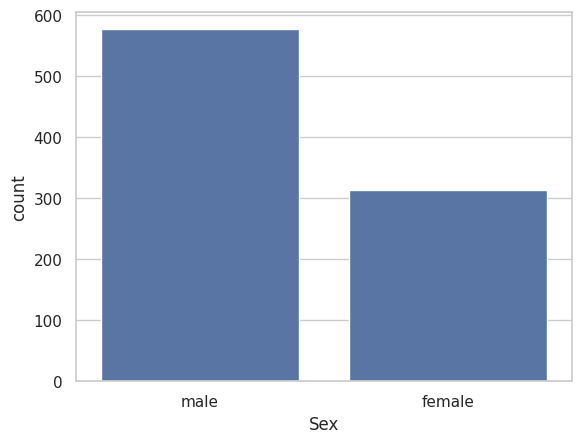

In [31]:

sns.countplot(x='Sex', data=df)


<Axes: xlabel='Pclass', ylabel='count'>

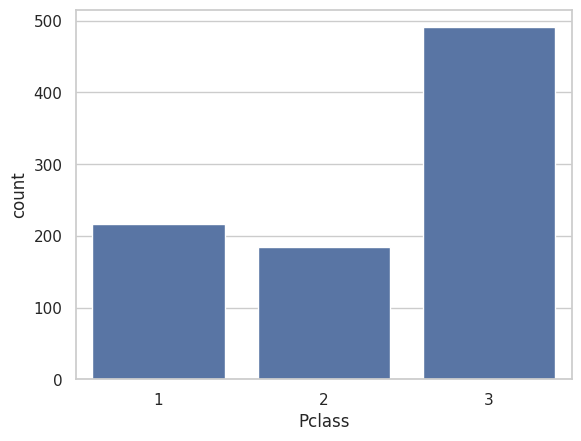

In [32]:
sns.countplot(x='Pclass', data=df)


<Axes: xlabel='Survived', ylabel='count'>

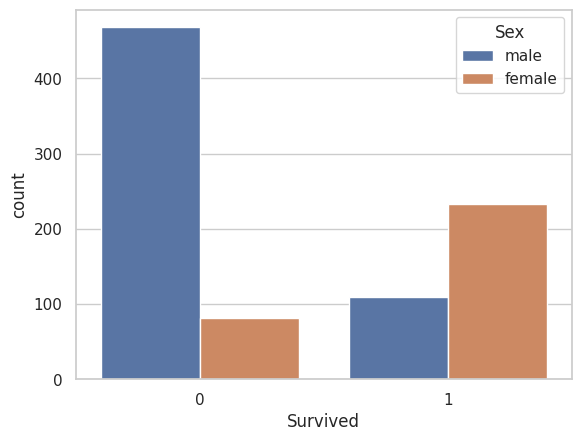

In [33]:
sns.countplot(x='Survived', hue='Sex', data=df)


 Bivariate Relationships

<Axes: xlabel='Age', ylabel='Count'>

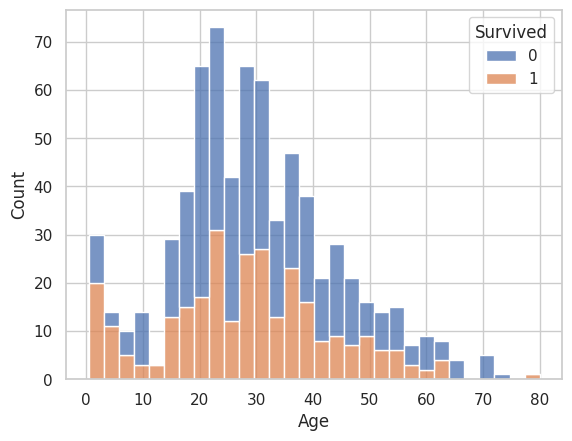

In [34]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)


<Axes: xlabel='Survived', ylabel='Fare'>

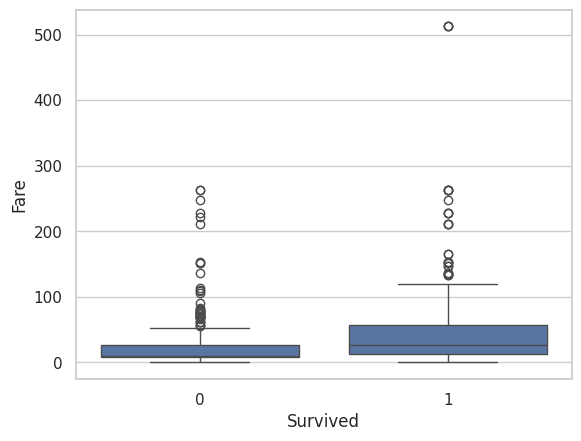

In [35]:
sns.boxplot(x='Survived', y='Fare', data=df)


<Axes: xlabel='Pclass', ylabel='count'>

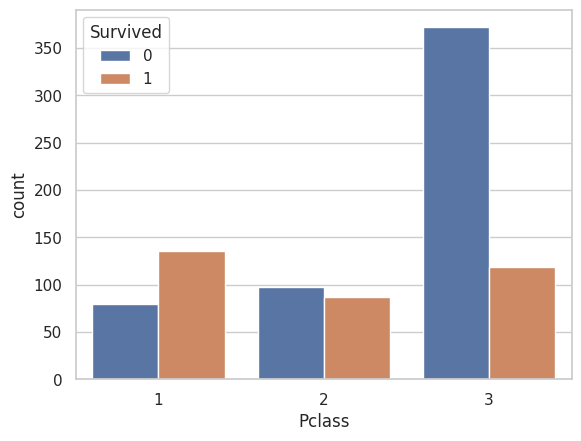

In [36]:
sns.countplot(x='Pclass', hue='Survived', data=df)


 Correlation Analysis

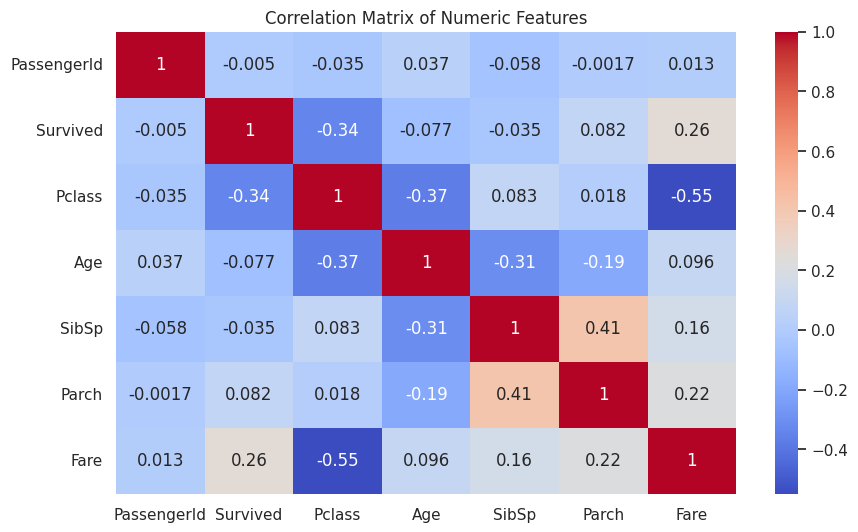

In [37]:
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

 Pairplot

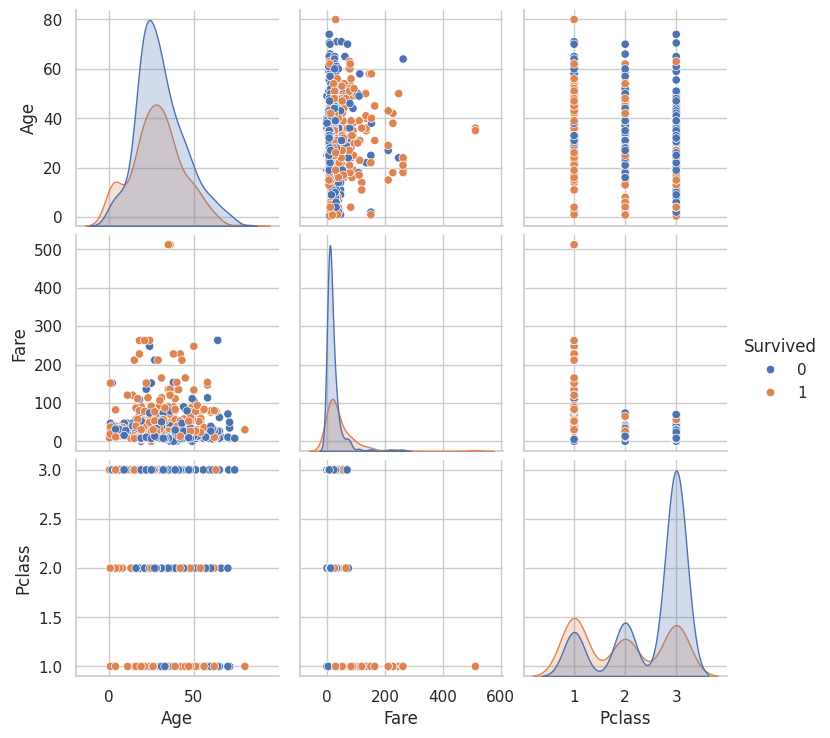

In [38]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')


 Detect Skewness

In [39]:
df[['Age', 'Fare']].skew()


,0
Age,0.389108
Fare,4.787317


Feature Engineering

 Impute Missing Values

In [40]:
# Age (continuous) — ~20% missing
#Use median per Pclass:
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))


In [41]:
#Embarked (categorical) — only 2 missing
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-660990438.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [42]:
#Cabin — Too many missing
#Drop it or create a feature like "HasCabin":
df['HasCabin'] = df['Cabin'].notnull().astype(int)


Create New Features

In [43]:
#FamilySize
#Combines siblings/spouse + parents/children

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [44]:
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

In [45]:
#Title Extraction from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
     'Rev', 'Sir', 'Jonkheer', 'Dona'],
    'Rare'
)
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})


Convert Categorical to Numerical

In [46]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [47]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Title'] = le.fit_transform(df['Title'])


Visualizations to Check Impact of New Features


Text(0.5, 1.0, 'Survival Rate vs Family Size')

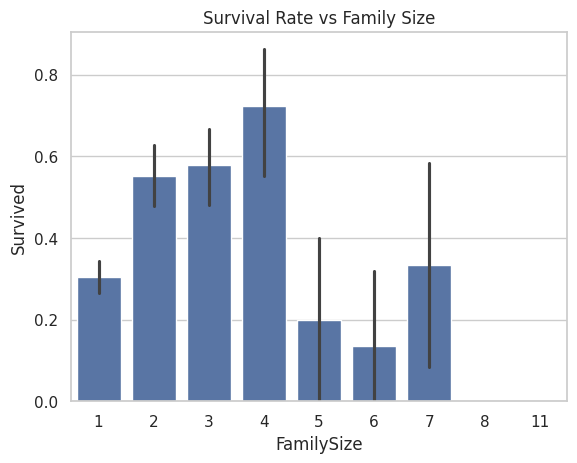

In [49]:
#Survival Rate by Family Size
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate vs Family Size')


Text(0.5, 1.0, 'Survival Rate by Title')

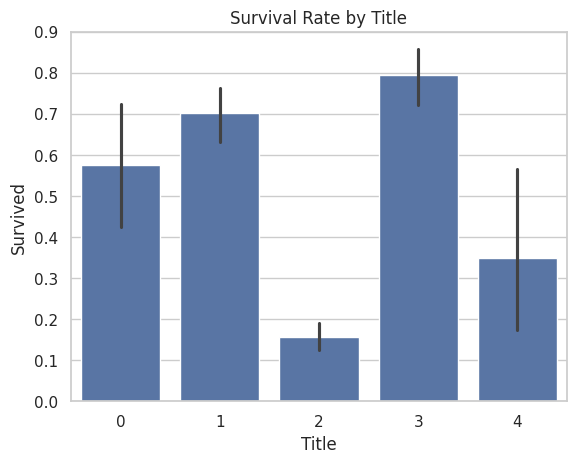

In [50]:
#Survival Rate by Title
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')


<Axes: xlabel='IsAlone', ylabel='count'>

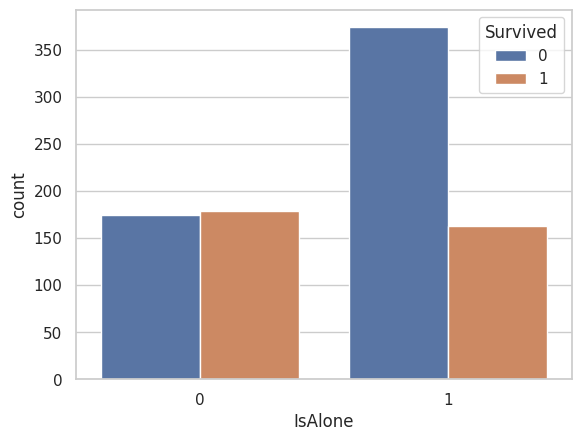

In [51]:
#IsAlone vs Survival
sns.countplot(x='IsAlone', hue='Survived', data=df)


In [52]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'HasCabin',
       'FamilySize', 'IsAlone', 'Title'],
      dtype='object')